In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Movie = pd.read_csv(r"C:\Users\NAMAN\Downloads\movies.csv")
Rating = pd.read_csv(r"C:\Users\NAMAN\Downloads\ratings.csv")

In [4]:
print(Movie.shape)
Movie.head()

(10329, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(Movie.isna().sum())
print(Movie.info())

movieId    0
title      0
genres     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None


In [6]:
print(Movie.duplicated().sum())
Movie.describe()

0


,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [7]:
print(Rating.shape)
Rating.head()

(105339, 4)


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [8]:
print(Rating.isna().sum())
print(Rating.info())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [11]:
print(Rating.duplicated().sum())
print(Rating['movieId'].value_counts())

0
movieId
296       325
356       311
318       308
480       294
593       290
         ... 
133583      1
132961      1
132883      1
132800      1
132796      1
Name: count, Length: 10325, dtype: int64


In [12]:
Rating.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [13]:
def fetch_title_year(obj):
    title = obj[:obj.index('(')].strip()
    year = obj[obj.index('(') + 1:obj.index(')')]
    return title, year

In [14]:
Movie[['title', 'year']] = Movie['title'].apply(lambda x: pd.Series(fetch_title_year(x)))

In [15]:
Movie['genres'] = Movie['genres'].str.replace('|',',')

In [16]:
Rating['timestamp'] = pd.to_datetime(Rating['timestamp'],unit='s')

In [17]:
df = Movie.merge(Rating,on='movieId')
df.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,2,5.0,1997-03-22 16:08:15
1,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,5,4.0,2011-04-22 19:37:19
2,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,8,5.0,1997-03-17 15:02:13
3,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,11,4.0,1996-12-17 09:43:30
4,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,14,4.0,1996-12-28 09:44:46


In [18]:
print(df.shape)
df.describe()

(105339, 7)


,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,105339
mean,13381.312477,364.924539,3.516850,2005-10-27 14:39:31.974254592
min,1.000000,1.000000,0.500000,1996-04-03 20:55:54
25%,1073.000000,192.000000,3.000000,2000-10-09 14:13:17.500000
50%,2497.000000,383.000000,3.500000,2005-05-03 21:00:56
75%,5991.000000,557.000000,4.000000,2010-06-02 16:26:38.500000
max,149532.000000,668.000000,5.000000,2016-01-10 05:48:39
std,26170.456869,197.486905,1.044872,NaN


In [19]:
df['title'].value_counts()

title
Pulp Fiction                       325
Forrest Gump                       311
Shawshank Redemption, The          308
Jurassic Park                      294
Silence of the Lambs, The          290
                                  ... 
Plenty                               1
Assassination                        1
Runoff                               1
Women of the Prehistoric Planet      1
Velocity of Gary, The                1
Name: count, Length: 9944, dtype: int64

Objective

Create a popularity based recommender system at a genre level :-

In [58]:
def recommender(genre, review_threshold, Num_recommendations):
    movie_genre = df[df['genres'].str.contains(genre)]
    vals = movie_genre.groupby(['title']).agg({'rating': ['mean', 'count']}).reset_index()
    vals.columns=['title','Avg_rating','num_reviews']
    filtered_vals = vals[vals['num_reviews'] >= review_threshold]
    top_movies = filtered_vals.sort_values('Avg_rating',ascending=False).head(Num_recommendations)
    return top_movies

In [59]:
Top5_Movies = recommender('Comedy',100,5)
Top5_Movies.head()

,title,Avg_rating,num_reviews
2059,Monty Python and the Holy Grail,4.301948,154
983,Fargo,4.271144,201
2457,"Princess Bride, The",4.163743,171
2480,Pulp Fiction,4.160000,325
1055,Forrest Gump,4.138264,311


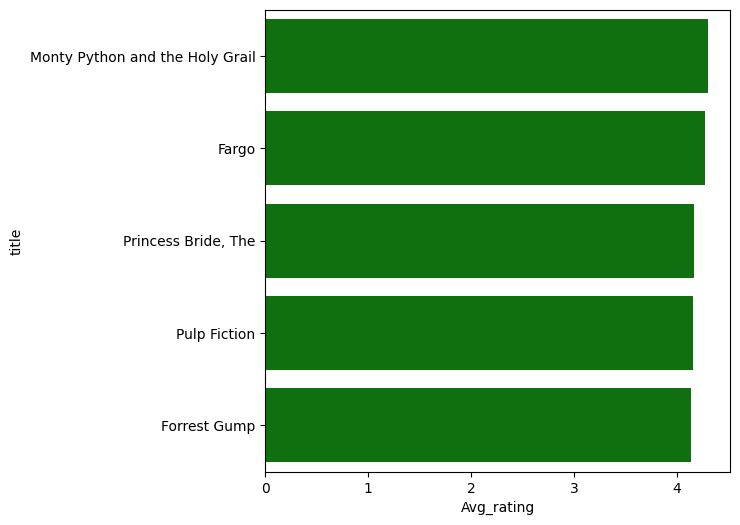

In [43]:
plt.figure(figsize=(6,6))
sns.barplot(data=Top5_Movies,x='Avg_rating',y='title',color='green')
plt.xlabel('Avg_rating')
plt.ylabel('title')
plt.show()

Objective

Create a content based recommender system :-

In [60]:
# def content_based_recommender(movie_title, Num_recommendations):
   
#     movie_genres = df[df['title'] == movie_title]['genres'].values[0]
#     similar_movies = df[df['genres'] == movie_genres]['title'].unique()
#     similar_movies = [movie for movie in similar_movies if movie != movie_title]
#     return similar_movies[:Num_recommendations]


In [61]:
# content_based_recommender('Toy Story',5)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [51]:
cv = TfidfVectorizer()
vectors = cv.fit_transform(Movie['genres'])

In [72]:
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.79977247, 0.1589222 , ..., 0.2638368 , 0.        ,
        0.        ],
       [0.79977247, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1589222 , 0.        , 1.        , ..., 0.60235038, 0.        ,
        0.        ],
       ...,
       [0.2638368 , 0.        , 0.60235038, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [79]:
def content_based_recommender(movie_title, Num_recommendations):
    idx = Movie[Movie['title'] == movie_title].index
    distance = similarity[idx]
    Top_Movies = sorted(list(enumerate(distance)),reverse=True,key= lambda x : x[1])[1:6]
    
    for i in Top_Movies :
        print(i)

In [78]:
content_based_recommender('Toy Story',5)